This notebook demonstrates how to visualize text embeddings from a pre-trained 
SentenceTransformer model using dimensionality reduction techniques: 
PCA, t-SNE, and UMAP — in both static and interactive 3D plots.

* 1. Installing required libraries
* 2. Preparing sample text data across 4 topics (Business, Tech, Sports, Politics)
* 3. Generating high-dimensional embeddings using a top-performing model
* 4. Reducing embeddings to 3D space using PCA, t-SNE, and UMAP
* 5. Visualizing those embeddings with both Matplotlib and Plotly

### Step 1: Install Libraries

In [ ]:
pip install "nbformat>=4.2.0"

### Step 2: Load the modules and prepare the dataset

In [4]:
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/Users/bentang/Desktop/bot_detection_ml/myenv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/bentang/Desktop/bot_detection_ml/myenv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


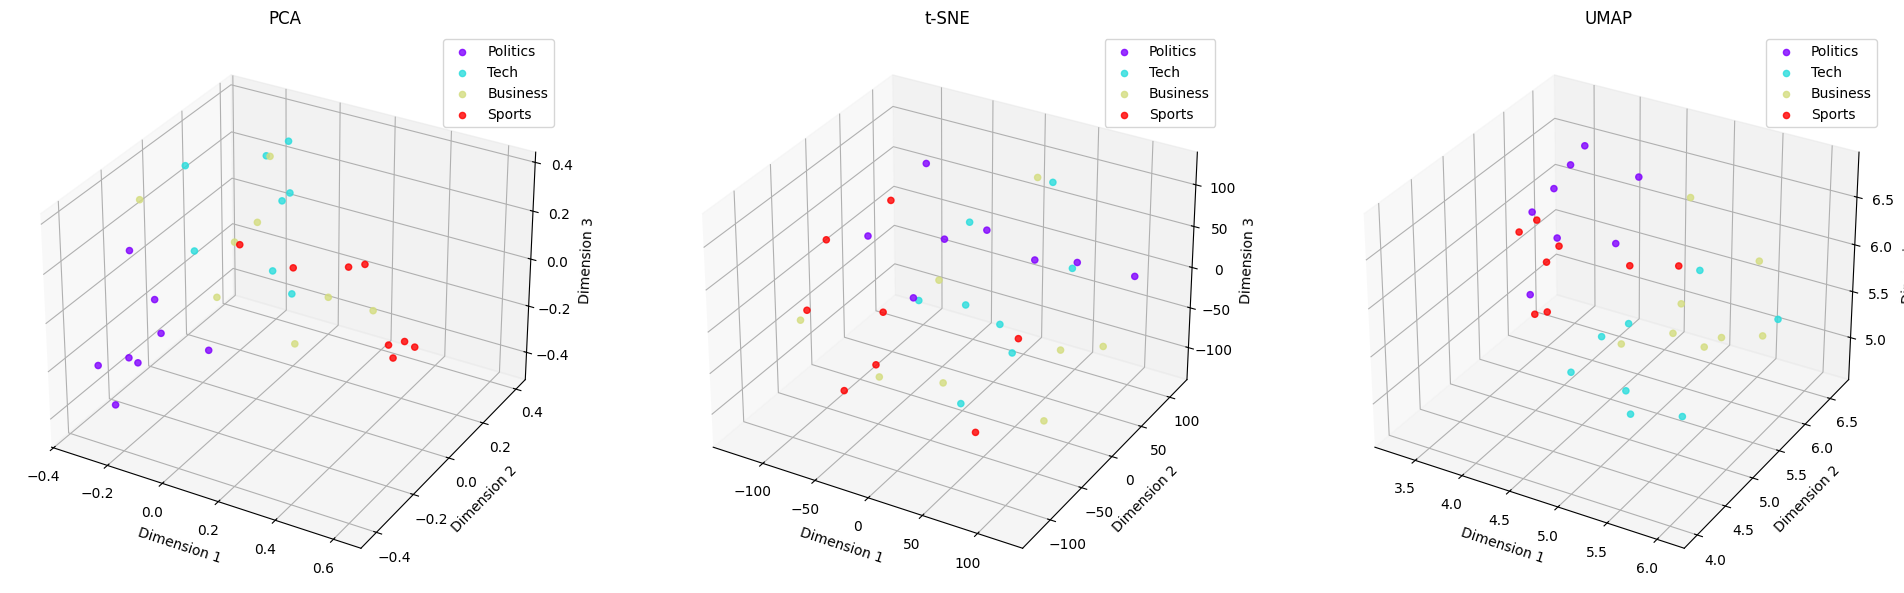

In [ ]:
def get_sample_data():

    # The sample data below was generated by ChatGPT 4o on March 24th at 1:21pm for better reference and faster production
    texts = [
        "Apple shares hit record high on strong earnings.",
        "Startup raises $5 million in venture funding.",
        "Amazon reports quarterly revenue exceeding expectations.",
        "Global markets rally as inflation concerns ease.",
        "Tesla announces new factory in Europe to meet demand.",
        "Netflix subscriber growth surpasses Wall Street estimates.",
        "Oil prices drop amid concerns about global economic slowdown.",
        "Microsoft acquires AI startup for $1 billion.",
        
        "New AI model breaks record in language understanding.",
        "Scientists develop battery that charges in under a minute.",
        "Google unveils quantum computing breakthrough.",
        "Researchers create chip that mimics human brain neurons.",
        "SpaceX successfully launches satellite internet constellation.",
        "Virtual reality headsets see surge in consumer adoption.",
        "Cybersecurity experts warn of new ransomware threat.",
        "Autonomous vehicles begin testing on public roads.",
        
        "Local team wins championship after a close game.",
        "Olympic gold medalist sets new world record.",
        "Basketball star signs record-breaking contract extension.",
        "Soccer tournament draws record global viewership.",
        "Tennis player announces retirement after legendary career.",
        "Underdog team upsets defending champions in playoff match.",
        "Athlete breaks century-old record in track competition.",
        "Esports tournament prize pool reaches $10 million milestone.",
        
        "Election results show surprising shift in voter sentiment.",
        "Government passes new law to support renewable energy.",
        "President announces diplomatic breakthrough with rival nation.",
        "Senate debates controversial healthcare legislation.",
        "Supreme Court issues landmark ruling on privacy rights.",
        "Protest movement gains momentum after policy announcement.",
        "United Nations calls emergency meeting on climate crisis.",
        "Trade agreement reached after months of tense negotiations."
    ]
    
    labels = (["Business"] * 8 + ["Tech"] * 8 + ["Sports"] * 8 + ["Politics"] * 8)
    
    return texts, labels